Lista de todas as palavras com 5 letras da língua portuguesa

In [2]:
# Obtendo palavras da língua portuguesa
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fserb/pt-br/master/dicio')
s = df.iloc[:,0]

# Filtrando apenas as palavras com 5 dígitos
palavras = s[s.str.len() == 5]

Análise por classes gramaticais

In [ ]:
!python -m spacy download pt_core_news_sm

In [4]:
import spacy
import pkg_resources,imp
imp.reload(pkg_resources)
nlp = spacy.load("pt_core_news_sm")

In [5]:
classes = {}
classes["PROPN"] = 0
classes["VERB"] = 0
classes["ADV"] = 0
classes["ADP"] = 0
classes["NOUN"] = 0
classes["DET"] = 0
classes["ADJ"] = 0
classes["PRON"] = 0
classes["INTJ"] = 0
classes["NUM"] = 0
classes["AUX"] = 0

for p in palavras:
  token = nlp(p)[0]
  classes[token.pos_] = classes[token.pos_] + 1

print(classes)

{'PROPN': 1679, 'VERB': 2039, 'ADV': 248, 'ADP': 28, 'NOUN': 8371, 'DET': 4, 'ADJ': 188, 'PRON': 9, 'INTJ': 16, 'NUM': 3, 'AUX': 1}


Ver popularidade de cada palavra

Será visto o quanto uma palavra se repete em textos de livros escolares.

Base: https://github.com/gazzola/corpus_readability_nlp_portuguese


In [ ]:
import requests
import urllib.request

LIMITE = 10 * 1024 * 1024

# Obter arquivos e ler conteúdos
user = "gazzola"
repo = "corpus_readability_nlp_portuguese"
url = "https://api.github.com/repos/{}/{}/git/trees/master?recursive=1".format(user, repo)
res = requests.get(url).json()
conteudo = ""
for file in res["tree"]:
  fileUrl = "https://raw.githubusercontent.com/{}/{}/master/{}".format(user, repo, file["path"])
  if fileUrl.endswith(".txt"):
    data = urllib.request.urlopen(fileUrl)
    for line in data:
      conteudo += " " + line.decode('utf-8')

  print(LIMITE, len(conteudo))    
  if len(conteudo) > LIMITE:
    break

In [25]:
# popularidade de cada palavra
popularidade = {}

# Para cada palavra, verificar quantas ocorrências existem no conteúdo selecionado
conteudoSeparado = conteudo.lower().split()
for i in range(len(palavras)):
  popularidade[palavras.iloc[i]] = conteudoSeparado.count(palavras.iloc[i])

Limpeza de palavras com acentos e ç

In [30]:
# limpando as chaves
for k in popularidade:
  keyLimpa = k

  keyLimpa = keyLimpa.replace("á", "a")
  keyLimpa = keyLimpa.replace("ã", "a")
  keyLimpa = keyLimpa.replace("â", "a")
  keyLimpa = keyLimpa.replace("é", "e")
  keyLimpa = keyLimpa.replace("ê", "e")
  keyLimpa = keyLimpa.replace("í", "i")
  keyLimpa = keyLimpa.replace("ï", "i")
  keyLimpa = keyLimpa.replace("ó", "o")
  keyLimpa = keyLimpa.replace("ô", "o")
  keyLimpa = keyLimpa.replace("õ", "o")
  keyLimpa = keyLimpa.replace("ú", "u")
  keyLimpa = keyLimpa.replace("ç", "c")

  popularidade[keyLimpa] = popularidade.pop(k)

In [32]:
palavras = palavras.str.replace("á", "a")
palavras = palavras.str.replace("à", "a")
palavras = palavras.str.replace("ã", "a")
palavras = palavras.str.replace("â", "a")
palavras = palavras.str.replace("é", "e")
palavras = palavras.str.replace("ê", "e")
palavras = palavras.str.replace("í", "i")
palavras = palavras.str.replace("ï", "i")
palavras = palavras.str.replace("ó", "o")
palavras = palavras.str.replace("ô", "o")
palavras = palavras.str.replace("õ", "o")
palavras = palavras.str.replace("ú", "u")
palavras = palavras.str.replace("ç", "c")

In [ ]:
# listando as palavras mais populares
NUM_PALAVRAS_POPULARES = 1000
count = 0
maisPopulares = [None] * NUM_PALAVRAS_POPULARES
for w in sorted(popularidade, key=popularidade.get, reverse=True):
  maisPopulares[count] = w
  count += 1
  print(w, popularidade[w])
  if count == NUM_PALAVRAS_POPULARES:
    break

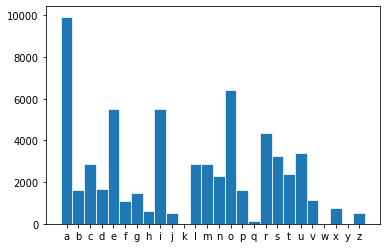

In [34]:
# Histograma das letas
import matplotlib.pyplot as plt

peso = [0] * 26
for palavra in palavras:
  for letra in palavra:
    peso[ord(letra)-97] += 1

fig, ax = plt.subplots()
ax.bar(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'], peso, width=1, edgecolor="white", linewidth=0.7)
plt.show()

Funções auxiliares

In [35]:
# Obter a lista de palavras que podem ser a resposta, baseado nas dicas já fornecidas
# certeza: array[5] contendo a letra certa para a respectiva posição
# exite: array[n] contendo letras existentes na palavra
# nao_existe: array[n] contendo letras que não tem na palavra
# nao_existe_na_posicao: array[5] contendo as letras que não existem na respectiva posição
def obterPossiveisPalavras(certeza, existe, nao_existe, nao_existe_na_posicao):
  letras = 'abcdefghijklmnopqrstuvwxyz'  
  
  for letra in nao_existe:
    letras = letras.replace(letra, "")
  
  regex = ""

  for i in range(5):
    if certeza[i] == "":
      letrasAtual = letras
      nao_na_posicao = nao_existe_na_posicao[i]
      for l in nao_na_posicao:
        letrasAtual = letrasAtual.replace(l, "")
      regex += "[" + letrasAtual + "]"
    else:
      regex += certeza[i]

  selecao = palavras[palavras.str.match(regex)]
  
  for letra in existe:
    selecao = selecao[selecao.str.match("[a-z]*" + letra + "+")]

  return selecao

In [36]:
# Obtem o peso da palavra baseado no peso dos caracteres
def getPesoPalavra(palavra):
  pesoPalavra = 0
  duplicado = [0] * 26

  for i in range(5):
    idx = ord(palavra[i])-97
    pesoPalavra += peso[idx]
    duplicado[idx] = 1

  if sum(duplicado) < 5:
    pesoPalavra = int(pesoPalavra/2)

  return pesoPalavra

In [37]:
# Obtem um valor dependendo da classe da palavra
def getValorPorClasse(classe):
  if classe == "NOUN":
    return 20
  elif classe == "VERB":
    return 20
  elif classe == "ADJ":
    return 20

  elif classe == "NUM":
    return 10
  elif classe == "PRON":
    return 10

  elif classe == "ADV":
    return 5
  elif classe == "AUX":
    return 5

  else:
    return 0


Estrutura para guardar as estatisticas de todas as palavras validas

In [38]:
stats = {}
for p in palavras:
  pop = popularidade.get(p, 0)
  classe = nlp(p)[0].pos_
  pes = getPesoPalavra(p)
  stats[p] = (pop, classe, pes)

print(stats["ficar"])

(118, 'VERB', 23805)


Escolhendo a primeira palavra

In [39]:
# Dentre as palavras mais populares, quais possuem mais pesos?
pesos = [0] * len(maisPopulares)
for i in range(len(maisPopulares)):
  pesos[i] = getPesoPalavra(maisPopulares[i])

lista1, popularesComMaiorPeso = zip(*sorted(zip(pesos, maisPopulares), reverse=True))
print(popularesComMaiorPeso)

('raios', 'serao', 'maior', 'irmao', 'terao', 'seria', 'reais', 'coisa', 'iamos', 'secao', 'acoes', 'lesao', 'radio', 'opera', 'teria', 'limao', 'uniao', 'estao', 'senao', 'verao', 'otima', 'beira', 'oscar', 'caros', 'arcos', 'solar', 'somar', 'ramos', 'sabio', 'seita', 'outra', 'autor', 'entao', 'aneis', 'claro', 'calor', 'marco', 'moral', 'molar', 'varie', 'acido', 'amido', 'copia', 'feira', 'moeda', 'epoca', 'rotas', 'ratos', 'apelo', 'poema', 'visao', 'amigo', 'etica', 'troca', 'traco', 'tocar', 'ricas', 'tomar', 'morta', 'crase', 'cesar', 'laser', 'mares', 'casou', 'norma', 'poeta', 'aonde', 'roupa', 'parou', 'rodas', 'etnia', 'prosa', 'sabor', 'obras', 'criam', 'urina', 'ideal', 'media', 'graos', 'retas', 'resta', 'estar', 'artes', 'torna', 'notar', 'ativo', 'lacos', 'seiva', 'noiva', 'navio', 'corda', 'dolar', 'cobra', 'braco', 'barco', 'polar', 'podia', 'cargo', 'citar', 'largo', 'tiram', 'recta', 'certa', 'letra', 'marte', 'matou', 'dieta', 'carne', 'exato', 'aluno', 'abriu', 

In [ ]:
import random
from datetime import datetime

# Sorteio entre 10% das palavras populares com maior peso
random.seed(datetime.now().timestamp)
idx = random.randint(0, int(len(maisPopulares)*0.1))

print(popularesComMaiorPeso[idx])

Escolha da próxima palavra

In [41]:
def obterPalpite(certeza, existe, nao_existe, nao_existe_na_posicao):
  possiveisPalavras = obterPossiveisPalavras(certeza, existe, nao_existe, nao_existe_na_posicao)

  maiorPeso = -1
  palpite = ""

  for possivelPalavra in possiveisPalavras:
    pesoPalavra = popularidade.get(possivelPalavra, 0)
    stat = stats[possivelPalavra]
    pesoPalavra = stat[0] + getValorPorClasse(stat[1])

    if pesoPalavra > maiorPeso:
      maiorPeso = pesoPalavra
      palpite = possivelPalavra
      print(possivelPalavra, maiorPeso)
    
  return palpite

In [ ]:
# Se fosse tentado a palavra "TERMO" e a palavra certa fosse "BRACO", 
# os vetores abaixo deverão ser preenchidos da seguinte forma
# certeza = ["","","","","o"]
# existe = ["r"]
# nao_existe = ["b","a","c"]
# nao_existe_na_posicao = ["", "r", "", "", ""]

certeza = ["","","","",""]
existe = []
nao_existe = []
nao_existe_na_posicao = ["", "", "", "", ""]

palpite = obterPalpite(certeza, existe, nao_existe, nao_existe_na_posicao)

print("Palpite: " + palpite.upper())